In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
pickups_brooklyn = pd.read_csv('Pickups_Brooklyn_June.csv', delimiter=',')
pickups_brooklyn['pickup_datetime'] = pickups_brooklyn['pickup_datetime'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [85]:
impdf['lon'] = impdf[col for col in impdf.columns if 'longitude' in col]

SyntaxError: invalid syntax (<ipython-input-85-b0b90b462d26>, line 1)

In [3]:
pickups_brooklyn.head()

,Unnamed: 0,pickup_datetime,pickup_longitude,pickup_latitude,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,passenger_count,trip_distance
0,20,2016-06-09 21:06:38,-74.016121,40.710899,1,5.0,2.00,0.0,8.30,1,0.70
1,60,2016-06-09 21:09:53,-74.008247,40.711269,1,10.0,3.39,0.0,14.69,1,2.02
2,71,2016-06-09 21:09:55,-74.016251,40.711048,1,19.0,4.06,0.0,24.36,1,5.56
3,124,2016-06-09 21:06:00,-74.003128,40.706345,1,20.0,2.20,0.0,23.50,1,4.20
4,139,2016-06-09 21:06:02,-73.987724,40.700386,1,11.5,1.00,0.0,13.80,1,2.30


In [4]:
del pickups_brooklyn['Unnamed: 0']

In [5]:
pickups_brooklyn['pickup_longitude'].values

array([-74.01612091, -74.00824738, -74.01625061, ..., -73.98654175,
       -74.00951385, -74.01699829])

In [6]:
pickups_brooklyn['location'] = np.nan
loc = []
for i in range(len(pickups_brooklyn['pickup_latitude'].values)):
    loc.append((pickups_brooklyn['pickup_longitude'].values[i], pickups_brooklyn['pickup_latitude'].values[i]))
pickups_brooklyn['location'] = loc

In [7]:
#pickups_brooklyn['location']

In [8]:
pickups_brooklyn.head()

,pickup_datetime,pickup_longitude,pickup_latitude,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,passenger_count,trip_distance,location
0,2016-06-09 21:06:38,-74.016121,40.710899,1,5.0,2.00,0.0,8.30,1,0.70,"(-74.0161209106, 40.710899353)"
1,2016-06-09 21:09:53,-74.008247,40.711269,1,10.0,3.39,0.0,14.69,1,2.02,"(-74.0082473755, 40.7112693787)"
2,2016-06-09 21:09:55,-74.016251,40.711048,1,19.0,4.06,0.0,24.36,1,5.56,"(-74.0162506104, 40.7110481262)"
3,2016-06-09 21:06:00,-74.003128,40.706345,1,20.0,2.20,0.0,23.50,1,4.20,"(-74.0031280518, 40.7063446045)"
4,2016-06-09 21:06:02,-73.987724,40.700386,1,11.5,1.00,0.0,13.80,1,2.30,"(-73.9877243042, 40.7003860474)"


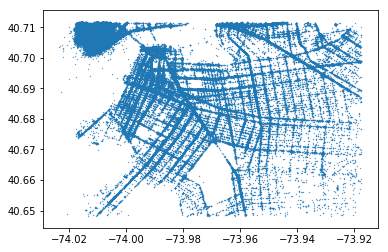

In [9]:
plt.scatter(pickups_brooklyn.pickup_longitude, pickups_brooklyn.pickup_latitude, s=0.1)

In [10]:
#plt.show()

In [84]:
def time_of_day(hour):
    if hour<6:
        return "night"
    elif hour<10:
        return "morning rush"
    elif hour<16:
        return "daytime"
    elif hour<19:
        return "evening_rush"
    else:
        return "night"

In [12]:
pickups_brooklyn['time_of_day'] = [time_of_day(x) for x in pickups_brooklyn['pickup_datetime'].dt.hour]

In [13]:
pickups_brooklyn.head()

,pickup_datetime,pickup_longitude,pickup_latitude,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,passenger_count,trip_distance,location,time_of_day
0,2016-06-09 21:06:38,-74.016121,40.710899,1,5.0,2.00,0.0,8.30,1,0.70,"(-74.0161209106, 40.710899353)",night
1,2016-06-09 21:09:53,-74.008247,40.711269,1,10.0,3.39,0.0,14.69,1,2.02,"(-74.0082473755, 40.7112693787)",night
2,2016-06-09 21:09:55,-74.016251,40.711048,1,19.0,4.06,0.0,24.36,1,5.56,"(-74.0162506104, 40.7110481262)",night
3,2016-06-09 21:06:00,-74.003128,40.706345,1,20.0,2.20,0.0,23.50,1,4.20,"(-74.0031280518, 40.7063446045)",night
4,2016-06-09 21:06:02,-73.987724,40.700386,1,11.5,1.00,0.0,13.80,1,2.30,"(-73.9877243042, 40.7003860474)",night


In [14]:
np.unique(pickups_brooklyn.time_of_day.values)

array(['daytime', 'evening_rush', 'morning rush', 'night'], dtype=object)

In [15]:
times_of_day = ["night", "morning rush", "daytime", "evening_rush"]

In [16]:
pickups_brooklyn_tod = {}
x_tod = {}
y_tod = {}
coords_tod = {}
min_lon = []
max_lon = []
min_lat = []
max_lat = []
for time in times_of_day:
    pickups_brooklyn_tod[time] = pickups_brooklyn[pickups_brooklyn['time_of_day'] == time]
    y_tod[time] = pickups_brooklyn_tod[time]['pickup_latitude'].values
    x_tod[time] = pickups_brooklyn_tod[time]['pickup_longitude'].values
    min_lat.append(min(x_tod[time]))
    max_lat.append(max(x_tod[time]))
    min_lon.append(min(y_tod[time]))
    max_lon.append(max(y_tod[time]))

print("minimum lon: "+ str(min(min_lon)))
print("maximum lon: "+ str(max(max_lon)))
print("minimum lat: "+ str(min(min_lat)))
print("maximum lat: "+ str(max(max_lat)))


minimum lon: 40.648311615
maximum lon: 40.7115974426
minimum lat: -74.0235214233
maximum lat: -73.9177093506


In [17]:
for time in times_of_day:
    coords_tod[time] = []
    for i in range(len(x_tod[time])):
        coords_tod[time].append([x_tod[time][i], y_tod[time][i]])

In [18]:
df1 = pd.DataFrame(x_tod['night'], y_tod['night'], )

In [19]:
df1 = df1.reset_index()

In [20]:
dft = {}
for time in times_of_day:
    d = {'longitude_x': x_tod[time], 'latitude_y': y_tod[time]}
    dft[time] = pd.DataFrame(d)

In [21]:
dft['night'].head()

,latitude_y,longitude_x
0,40.710899,-74.016121
1,40.711269,-74.008247
2,40.711048,-74.016251
3,40.706345,-74.003128
4,40.700386,-73.987724


In [22]:
dft = {}
for time in times_of_day:
    
    d = {'longitude_x': x_tod[time], 'latitude_y': y_tod[time]}
    dft[time] = pd.DataFrame(d)

In [23]:
dft['night'].head()

,latitude_y,longitude_x
0,40.710899,-74.016121
1,40.711269,-74.008247
2,40.711048,-74.016251
3,40.706345,-74.003128
4,40.700386,-73.987724


In [24]:
from sklearn.cluster import KMeans

In [25]:
pickups_brooklyn['location'].values

array([(-74.016120910600009, 40.710899353000002),
       (-74.008247375500005, 40.711269378699996),
       (-74.016250610399993, 40.711048126199998), ...,
       (-73.986541748000008, 40.668949127200001),
       (-74.009513854999994, 40.705314636200001),
       (-74.016998291000007, 40.705440521199996)], dtype=object)

In [26]:
# cluster all data by locations
K_allData = 5
k_allData = KMeans(K_allData)
k_allData.fit(pickups_brooklyn[['pickup_latitude', 'pickup_longitude']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
pickups_brooklyn['kmeans_cluster'] = k_allData.labels_

In [28]:
pickups_brooklyn.head()

,pickup_datetime,pickup_longitude,pickup_latitude,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,passenger_count,trip_distance,location,time_of_day,kmeans_cluster
0,2016-06-09 21:06:38,-74.016121,40.710899,1,5.0,2.00,0.0,8.30,1,0.70,"(-74.0161209106, 40.710899353)",night,0
1,2016-06-09 21:09:53,-74.008247,40.711269,1,10.0,3.39,0.0,14.69,1,2.02,"(-74.0082473755, 40.7112693787)",night,0
2,2016-06-09 21:09:55,-74.016251,40.711048,1,19.0,4.06,0.0,24.36,1,5.56,"(-74.0162506104, 40.7110481262)",night,0
3,2016-06-09 21:06:00,-74.003128,40.706345,1,20.0,2.20,0.0,23.50,1,4.20,"(-74.0031280518, 40.7063446045)",night,0
4,2016-06-09 21:06:02,-73.987724,40.700386,1,11.5,1.00,0.0,13.80,1,2.30,"(-73.9877243042, 40.7003860474)",night,1


['mistyrose', 'tan', 'wheat', 'olivedrab', 'paleturquoise']


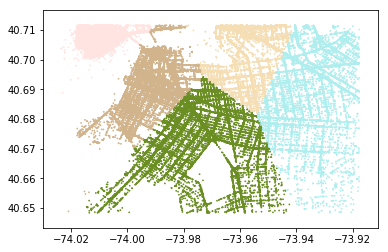

In [29]:
import random
from matplotlib import colors as mcolors

num_colors=len(set(k_allData.labels_))   #it's the number of different labels except for 1 (the -1 label)
colors=list(mcolors.CSS4_COLORS.keys())  #found this by searching "python color list"
cluster_colors=random.choices(colors, k=num_colors)
print(cluster_colors)
x_=[]
y_=[]
c_=[]
for label, x, y in zip(k_allData.labels_, pickups_brooklyn['pickup_longitude'].values, pickups_brooklyn['pickup_latitude'].values):
    if label==-1:
        continue
    x_.append(x)
    y_.append(y)
    c_.append(cluster_colors[label])
    #plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=0.55,c=c_)

In [30]:
K=5
k=KMeans(K)

In [31]:
dft['night'].head()

,latitude_y,longitude_x
0,40.710899,-74.016121
1,40.711269,-74.008247
2,40.711048,-74.016251
3,40.706345,-74.003128
4,40.700386,-73.987724


In [32]:
dft['night'].values

array([[ 40.71089935, -74.01612091],
       [ 40.71126938, -74.00824738],
       [ 40.71104813, -74.01625061],
       ..., 
       [ 40.66894913, -73.98654175],
       [ 40.70531464, -74.00951385],
       [ 40.70544052, -74.01699829]])

In [33]:
k.fit(dft['night'].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
dft['night']['kmeans_cluster'] = k.labels_

In [35]:
dft['night'].head()

,latitude_y,longitude_x,kmeans_cluster
0,40.710899,-74.016121,0
1,40.711269,-74.008247,0
2,40.711048,-74.016251,0
3,40.706345,-74.003128,0
4,40.700386,-73.987724,3


['mistyrose', 'navy', 'pink', 'blanchedalmond', 'olive']


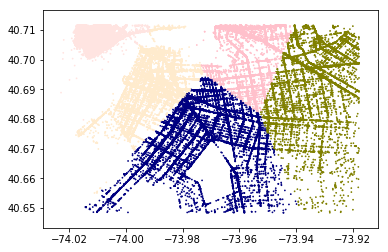

In [36]:
import random
from matplotlib import colors as mcolors

num_colors=len(set(k.labels_))   #it's the number of different labels except for 1 (the -1 label)
colors=list(mcolors.CSS4_COLORS.keys())  #found this by searching "python color list"
cluster_colors=random.choices(colors, k=num_colors)
print(cluster_colors)
x_=[]
y_=[]
c_=[]
for label, x, y in zip(k.labels_, dft['night']['longitude_x'].values, dft['night']['latitude_y'].values):
    if label==-1:
        continue
    x_.append(x)
    y_.append(y)
    c_.append(cluster_colors[label])
    #plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=0.55,c=c_)

In [37]:
dft['night'].head()

,latitude_y,longitude_x,kmeans_cluster
0,40.710899,-74.016121,0
1,40.711269,-74.008247,0
2,40.711048,-74.016251,0
3,40.706345,-74.003128,0
4,40.700386,-73.987724,3


In [38]:
from sklearn.metrics.pairwise import pairwise_distances

In [39]:
dft_sample = {}
dft_sample['night'] = dft['night'].sample(n=10000)

In [40]:
dft_sample['night']

,latitude_y,longitude_x,kmeans_cluster
172387,40.711594,-74.015465,0
48094,40.701542,-74.011421,0
65053,40.706028,-74.003975,0
56500,40.678764,-73.995575,3
146616,40.705914,-74.006653,0
177004,40.703911,-74.014427,0
164973,40.697506,-73.932465,4
146924,40.700680,-73.941940,4
105869,40.704098,-74.009438,0
152550,40.696789,-73.934799,4


In [41]:
dft_sample['night']['coord'] = np.nan

In [42]:
dft_sample['night'].head()

,latitude_y,longitude_x,kmeans_cluster,coord
172387,40.711594,-74.015465,0,NaN
48094,40.701542,-74.011421,0,NaN
65053,40.706028,-74.003975,0,NaN
56500,40.678764,-73.995575,3,NaN
146616,40.705914,-74.006653,0,NaN


In [43]:
sampleCoords = {}
sampleCoords['night'] = []
for x, y in zip(dft_sample['night']['longitude_x'].values, dft_sample['night']['latitude_y'].values):
    coords = [x, y]
    sampleCoords['night'].append(coords)
dft_sample['night']['coord'] = sampleCoords['night']

In [44]:
dft_sample['night']['coord'].values

array([list([-74.015464782700008, 40.711593627900001]),
       list([-74.011421203599994, 40.701541900599999]),
       list([-74.003974914599993, 40.706027984599999]), ...,
       list([-73.987670898399998, 40.667301178000002]),
       list([-74.0078125, 40.704864502]),
       list([-73.958312988299994, 40.710411071799996])], dtype=object)

In [45]:
coords = []
for i in range(len(dft_sample['night']['longitude_x'].values)):
    coords.append([dft_sample['night']['longitude_x'].values[i], dft_sample['night']['latitude_y'].values[i]])

In [46]:
diest = pairwise_distances(coords, metric='euclidean', n_jobs=1)

In [47]:
diest

array([[ 0.        ,  0.01083456,  0.01276689, ...,  0.05229074,
         0.01019012,  0.05716403],
       [ 0.01083456,  0.        ,  0.00869323, ...,  0.04167138,
         0.00490535,  0.05384371],
       [ 0.01276689,  0.00869323,  0.        , ...,  0.04201888,
         0.00401008,  0.04587181],
       ..., 
       [ 0.05229074,  0.04167138,  0.04201888, ...,  0.        ,
         0.04262262,  0.05215697],
       [ 0.01019012,  0.00490535,  0.00401008, ...,  0.04262262,
         0.        ,  0.0498093 ],
       [ 0.05716403,  0.05384371,  0.04587181, ...,  0.05215697,
         0.0498093 ,  0.        ]])

In [48]:
dft_sample['night'].head()

,latitude_y,longitude_x,kmeans_cluster,coord
172387,40.711594,-74.015465,0,"[-74.0154647827, 40.7115936279]"
48094,40.701542,-74.011421,0,"[-74.0114212036, 40.7015419006]"
65053,40.706028,-74.003975,0,"[-74.0039749146, 40.7060279846]"
56500,40.678764,-73.995575,3,"[-73.9955749512, 40.6787643433]"
146616,40.705914,-74.006653,0,"[-74.006652832, 40.7059135437]"


In [49]:
from sklearn.metrics import silhouette_score

In [50]:
silhouette_avg = silhouette_score(diest, dft_sample['night']['kmeans_cluster'], metric="precomputed")

In [51]:
silhouette_avg

0.5899937020617374

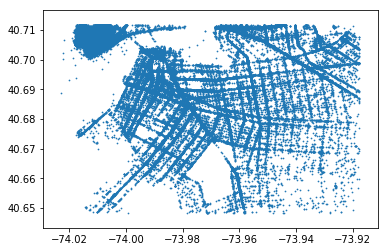

In [52]:
plt.scatter(dft['night']['longitude_x'].values, dft['night']['latitude_y'].values, s=0.5, )

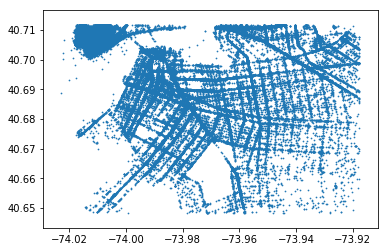

In [53]:
plt.scatter(x_tod['night'], y_tod['night'], s=0.5)

In [54]:
dft['night']['cluster']=k.fit_predict(dft['night'])

In [55]:
type(x_tod['night'][0])

numpy.float64

In [56]:
#axes = plt.scatter(x_tod["night"], y_tod["night"]).axes
#print(plt.Axes.get_ylim(axes))
#print(plt.Axes.get_xlim(axes))

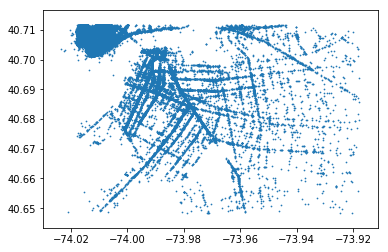

In [57]:
plt.scatter(x_tod["daytime"], y_tod["daytime"], s=0.5)

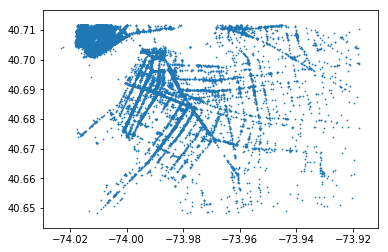

In [58]:
plt.scatter(x_tod["evening_rush"], y_tod["evening_rush"], s=0.5)

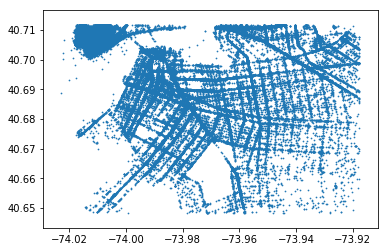

In [59]:
plt.scatter(x_tod['night'], y_tod['night'], s=0.5)

In [60]:
# Density based and K-Means

In [61]:
def createTrainAndTestSet(x, y):
    numTrain = len(x)*2/3
    x_train = x[:numTrain]
    y_train = y[numTrain:]
    x_test = x[:numTrain]
    y_test = y[numTrain:]

In [62]:
# examine tips

In [63]:
pickups_brooklyn.head()

,pickup_datetime,pickup_longitude,pickup_latitude,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,passenger_count,trip_distance,location,time_of_day,kmeans_cluster
0,2016-06-09 21:06:38,-74.016121,40.710899,1,5.0,2.00,0.0,8.30,1,0.70,"(-74.0161209106, 40.710899353)",night,0
1,2016-06-09 21:09:53,-74.008247,40.711269,1,10.0,3.39,0.0,14.69,1,2.02,"(-74.0082473755, 40.7112693787)",night,0
2,2016-06-09 21:09:55,-74.016251,40.711048,1,19.0,4.06,0.0,24.36,1,5.56,"(-74.0162506104, 40.7110481262)",night,0
3,2016-06-09 21:06:00,-74.003128,40.706345,1,20.0,2.20,0.0,23.50,1,4.20,"(-74.0031280518, 40.7063446045)",night,0
4,2016-06-09 21:06:02,-73.987724,40.700386,1,11.5,1.00,0.0,13.80,1,2.30,"(-73.9877243042, 40.7003860474)",night,1


In [64]:
def calculateTipsPerc(fare, tips):
    return tips/fare

In [65]:
fares = pickups_brooklyn['fare_amount'].unique()
fares.sort()
fares

array([ -1.00000000e+02,  -7.90000000e+01,  -6.00000000e+01,
        -5.50000000e+01,  -5.20000000e+01,  -4.50000000e+01,
        -3.00000000e+01,  -2.65000000e+01,  -2.50000000e+01,
        -2.18000000e+01,  -2.15000000e+01,  -2.13000000e+01,
        -2.00000000e+01,  -1.85000000e+01,  -1.43000000e+01,
        -1.05000000e+01,  -9.50000000e+00,  -7.50000000e+00,
        -7.00000000e+00,  -6.50000000e+00,  -6.00000000e+00,
        -5.50000000e+00,  -5.00000000e+00,  -4.70000000e+00,
        -4.50000000e+00,  -4.00000000e+00,  -3.50000000e+00,
        -3.00000000e+00,  -2.50000000e+00,   0.00000000e+00,
         1.00000000e-02,   8.00000000e-02,   1.00000000e-01,
         2.30000000e-01,   2.60000000e-01,   5.00000000e-01,
         1.00000000e+00,   2.50000000e+00,   3.00000000e+00,
         3.30000000e+00,   3.50000000e+00,   4.00000000e+00,
         4.30000000e+00,   4.50000000e+00,   4.70000000e+00,
         4.90000000e+00,   5.00000000e+00,   5.05000000e+00,
         5.30000000e+00,

In [66]:
pickups_brooklyn.shape

(416527, 13)

In [67]:
pickups_brooklyn = pickups_brooklyn[pickups_brooklyn['fare_amount'] >0]

In [68]:
pickups_brooklyn.shape

(416183, 13)

In [69]:
fares = pickups_brooklyn['fare_amount'].unique()
fares.sort()
# There are fares with negative values or value 0, remove these rows?

In [70]:
tipsPerc = []
pickups_brooklyn['tips_perc'] = np.nan
for x, y in zip(pickups_brooklyn['fare_amount'].values, pickups_brooklyn['tip_amount'].values):
    tipsPerc.append(round(calculateTipsPerc(x, y), 2))
pickups_brooklyn['tips_perc'] = tipsPerc

In [71]:
# plot histogram of tipsPerc
#np.histogram(pickups_brooklyn['tips_perc'])#.hist(bins=0.5).plot()
len(pickups_brooklyn['tips_perc'].unique())
#len(pickups_brooklyn['tips_perc'].values)

294

In [72]:
#plt.hist(pickups_brooklyn['tips_perc'])  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
#plt.show()

In [73]:
#pickups_brooklyn.hist('tips_perc', bins='auto')

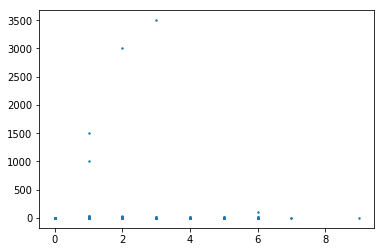

In [74]:
plt.scatter(pickups_brooklyn['passenger_count'].values, pickups_brooklyn['tips_perc'].values, s=2)

In [75]:
pickups_brooklyn = pickups_brooklyn[pickups_brooklyn['tips_perc'] <1]

In [76]:
pickups_brooklyn.shape

(415587, 14)

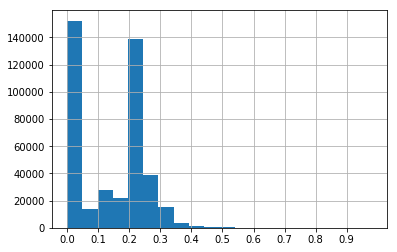

In [77]:
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 0.1))
ax.set_yticks(np.arange(0, 160000, 20000))
plt.hist(pickups_brooklyn['tips_perc'], bins=20)
plt.grid()
plt.show()

In [78]:
pickups_brooklyn.head()

,pickup_datetime,pickup_longitude,pickup_latitude,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,passenger_count,trip_distance,location,time_of_day,kmeans_cluster,tips_perc
0,2016-06-09 21:06:38,-74.016121,40.710899,1,5.0,2.00,0.0,8.30,1,0.70,"(-74.0161209106, 40.710899353)",night,0,0.40
1,2016-06-09 21:09:53,-74.008247,40.711269,1,10.0,3.39,0.0,14.69,1,2.02,"(-74.0082473755, 40.7112693787)",night,0,0.34
2,2016-06-09 21:09:55,-74.016251,40.711048,1,19.0,4.06,0.0,24.36,1,5.56,"(-74.0162506104, 40.7110481262)",night,0,0.21
3,2016-06-09 21:06:00,-74.003128,40.706345,1,20.0,2.20,0.0,23.50,1,4.20,"(-74.0031280518, 40.7063446045)",night,0,0.11
4,2016-06-09 21:06:02,-73.987724,40.700386,1,11.5,1.00,0.0,13.80,1,2.30,"(-73.9877243042, 40.7003860474)",night,1,0.09


In [79]:
def classifyTips(tipPerc):
    if tipPerc <= 0.05:
        return 1
    elif tipPerc <= 0.1:
        return 2
    elif tipPerc <= 0.15:
        return 3
    elif tipPerc <= 0.2:
        return 4
    elif tipPerc <= 0.25:
        return 5
    elif tipPerc <= 0.3:
        return 6
    elif tipPerc <= 0.35:
        return 7
    else:
        return 8

In [80]:
#type(pickups_brooklyn['tips_perc'].values
for x in (pickups_brooklyn['tips_perc'].values):
     classifyTips(x)

In [81]:
classifyTips(pickups_brooklyn['tips_perc'].values[0])

8

In [82]:
pickups_brooklyn['tipClass'] = [classifyTips(x) for x in pickups_brooklyn['tips_perc'].values]

In [83]:
pickups_brooklyn.head()

,pickup_datetime,pickup_longitude,pickup_latitude,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,passenger_count,trip_distance,location,time_of_day,kmeans_cluster,tips_perc,tipClass
0,2016-06-09 21:06:38,-74.016121,40.710899,1,5.0,2.00,0.0,8.30,1,0.70,"(-74.0161209106, 40.710899353)",night,0,0.40,8
1,2016-06-09 21:09:53,-74.008247,40.711269,1,10.0,3.39,0.0,14.69,1,2.02,"(-74.0082473755, 40.7112693787)",night,0,0.34,7
2,2016-06-09 21:09:55,-74.016251,40.711048,1,19.0,4.06,0.0,24.36,1,5.56,"(-74.0162506104, 40.7110481262)",night,0,0.21,5
3,2016-06-09 21:06:00,-74.003128,40.706345,1,20.0,2.20,0.0,23.50,1,4.20,"(-74.0031280518, 40.7063446045)",night,0,0.11,3
4,2016-06-09 21:06:02,-73.987724,40.700386,1,11.5,1.00,0.0,13.80,1,2.30,"(-73.9877243042, 40.7003860474)",night,1,0.09,2
